This notebook runs a pipeline with the following steps:
* Create a test Visibility dataset.
   * No visibility sample noise. Just testing that things are working exactly as expected.
   * Using the GLEAM sky model with station-dependent Faraday rotation and everybeam station beam models.
   * Add complex Gaussian noise corruptions to station gains and leakage.
   * Write to disk in MSv2 format.
* Read MSv2 data into Visibility dataset.$^{*}$
* Predict model visibilities (using GLEAM and everybeam).$^{*}$
* Do polarised bandpass calibration.$^{*}$
* Fit for the  $\lambda^{2}$-dependent rotation of each station.
* Redo predict with RM estimates.$^{*}$
* Redo polarised bandpass calibration.$^{*}$
* Check for convergence.

\* xarray dataset map_blocks() is used to distribute frequency sub-bands across dask tasks.

In [1]:
from time import perf_counter

from IPython.display import Image

from ska_sdp_instrumental_calibration.workflow.pipelines import (
    bandpass_polarisation,
)

<frozen abc>:106: FutureWarning: xarray subclass Visibility should explicitly define __slots__


In [2]:
ddir = "/data/EOS_1/mit183"
t0 = perf_counter()
bandpass_polarisation.run(
    {
        # Required external data
        "gleamfile": f"{ddir}/gleamegc.dat",
        "eb_ms": f"{ddir}/SKA/SP-4626/OSKAR_MOCK.ms",
        "eb_coeffs": f"{ddir}/SKA/SP-4626/ska-sdp-func-everybeam/coeffs",
        # Other parameters
        "ms_name": "demo.ms",
        "h5parm_name": "demo.h5",
        "gains": True,
        "leakage": True,
        "rotation": True,
        "wide_channels": True,
        "normalise_at_beam_centre": True,
    }
)
print(f"pipeline ran in {perf_counter() - t0:.1f} seconds")

2025-05-16 13:58:58,361 - workflow.pipeline_config - INFO - Simulating demo MSv2 input


1|2025-05-16T03:58:58.361Z|INFO|MainThread|__init__|pipeline_config.py#133||Simulating demo MSv2 input


2025-05-16 13:58:58,364 - workflow.pipeline_config - INFO - Initialising the EveryBeam telescope model with /data/EOS_1/mit183/SKA/SP-4626/OSKAR_MOCK.ms


1|2025-05-16T03:58:58.364Z|INFO|MainThread|__init__|pipeline_config.py#189||Initialising the EveryBeam telescope model with /data/EOS_1/mit183/SKA/SP-4626/OSKAR_MOCK.ms


2025-05-16 13:58:58,366 - workflow.pipeline_config - INFO - Generating a demo MSv2 Measurement Set demo.ms


1|2025-05-16T03:58:58.366Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#205||Generating a demo MSv2 Measurement Set demo.ms


2025-05-16 13:58:58,369 - workflow.pipeline_config - INFO - Generating LSM for simulation with:


1|2025-05-16T03:58:58.369Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#212||Generating LSM for simulation with:


2025-05-16 13:58:58,370 - workflow.pipeline_config - INFO -  - Search radius: 5.0 deg


1|2025-05-16T03:58:58.370Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#213|| - Search radius: 5.0 deg


2025-05-16 13:58:58,371 - workflow.pipeline_config - INFO -  - Flux limit: 1 Jy


1|2025-05-16T03:58:58.371Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#214|| - Flux limit: 1 Jy


2025-05-16 13:58:58,373 - workflow.pipeline_config - INFO -  - GLEAMEGC file: /data/EOS_1/mit183/gleamegc.dat


1|2025-05-16T03:58:58.373Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#216|| - GLEAMEGC file: /data/EOS_1/mit183/gleamegc.dat


2025-05-16 13:58:58,965 - processing_tasks.lsm - INFO - extracted 37 GLEAM components


1|2025-05-16T03:58:58.965Z|INFO|MainThread|generate_lsm_from_gleamegc|lsm.py#266||extracted 37 GLEAM components


2025-05-16 13:58:58,967 - workflow.pipeline_config - INFO - LSM contains 37 components


1|2025-05-16T03:58:58.967Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#235||LSM contains 37 components


2025-05-16 13:58:58,993 - workflow.utils - INFO - Using AA1-Low with 20 stations


1|2025-05-16T03:58:58.993Z|INFO|MainThread|create_demo_ms|utils.py#167||Using AA1-Low with 20 stations


2025-05-16 13:58:59,595 - workflow.utils - INFO - Applying DI lambda^2-dependent rotations during predict


1|2025-05-16T03:58:59.595Z|INFO|MainThread|create_demo_ms|utils.py#200||Applying DI lambda^2-dependent rotations during predict


2025-05-16 13:58:59,598 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T03:58:59.598Z|INFO|MainThread|predict_from_components|predict.py#168||Using EveryBeam model in predict
1|2025-05-16T03:58:59.603Z|INFO|MainThread|__init__|beams.py#86||Initialising beams for Low
1|2025-05-16T03:58:59.662Z|INFO|MainThread|__init__|beams.py#95||Setting beam normalisation for OSKAR data


2025-05-16 13:59:01,599 - workflow.utils - INFO - Applying direction-independent gain corruptions


1|2025-05-16T03:59:01.599Z|INFO|MainThread|create_demo_ms|utils.py#223||Applying direction-independent gain corruptions
1|2025-05-16T03:59:02.097Z|INFO|MainThread|run|bandpass_polarisation.py#84||Starting pipeline with 16-channel chunks
1|2025-05-16T03:59:02.097Z|INFO|MainThread|run|bandpass_polarisation.py#88||No dask cluster supplied. Using LocalCluster


/u/mit183/.pyenv/versions/3.11.7/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40919 instead
  warnings.warn(


1|2025-05-16T03:59:03.607Z|INFO|MainThread|run|bandpass_polarisation.py#98||Generating LSM for predict with:
1|2025-05-16T03:59:03.609Z|INFO|MainThread|run|bandpass_polarisation.py#99|| - Search radius: 5.0 deg
1|2025-05-16T03:59:03.610Z|INFO|MainThread|run|bandpass_polarisation.py#100|| - Flux limit: 1 Jy
1|2025-05-16T03:59:03.611Z|INFO|MainThread|run|bandpass_polarisation.py#102|| - GLEAMEGC catalogue file: /data/EOS_1/mit183/gleamegc.dat


2025-05-16 13:59:04,306 - processing_tasks.lsm - INFO - extracted 37 GLEAM components


1|2025-05-16T03:59:04.306Z|INFO|MainThread|generate_lsm_from_gleamegc|lsm.py#266||extracted 37 GLEAM components
1|2025-05-16T03:59:04.309Z|INFO|MainThread|run|bandpass_polarisation.py#119||LSM contains 37 components
1|2025-05-16T03:59:04.309Z|WARNING|MainThread|run|bandpass_polarisation.py#122||Not running end-to-end version.
1|2025-05-16T03:59:04.309Z|INFO|MainThread|run|bandpass_polarisation.py#130||Will ingest demo.ms in 16-channel chunks
1|2025-05-16T03:59:04.313Z|INFO|MainThread|create_visibility_from_ms|vis_io_ms.py#339||Reading uni. fields [0], uni. data descs [0]
1|2025-05-16T03:59:04.460Z|INFO|MainThread|run|bandpass_polarisation.py#162||Setting vis predict in 16-channel chunks
1|2025-05-16T03:59:04.741Z|INFO|MainThread|run|bandpass_polarisation.py#184||Setting calibration in 16-channel chunks
1|2025-05-16T03:59:04.742Z|INFO|MainThread|run|bandpass_polarisation.py#185|| - Using solver jones_substitution
1|2025-05-16T03:59:04.744Z|INFO|MainThread|run|bandpass_polarisation.py#18

2025-05-16 13:59:06,600 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:06,610 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:06,627 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:06,813 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:06,845 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:06,989 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:07,013 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:07,810 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T03:59:10.935Z|INFO|MainThread|run|bandpass_polarisation.py#202||Fitting differential rotations
1|2025-05-16T03:59:11.848Z|INFO|MainThread|run|bandpass_polarisation.py#207||Re-predicting model vis with RM estimates
1|2025-05-16T03:59:11.911Z|INFO|MainThread|run|bandpass_polarisation.py#221||Resetting calibration in 16-channel chunks
1|2025-05-16T03:59:11.912Z|INFO|MainThread|run|bandpass_polarisation.py#222|| - First using solver jones_substitution again
1|2025-05-16T03:59:11.980Z|INFO|MainThread|run|bandpass_polarisation.py#231|| - Then improving using solver normal_equations
1|2025-05-16T03:59:12.028Z|INFO|MainThread|run|bandpass_polarisation.py#242||Running graph and returning calibration solutions


2025-05-16 13:59:12,366 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:12,378 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:12,441 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:12,515 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:12,668 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:12,676 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:12,730 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:12,752 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T03:59:16.681Z|INFO|MainThread|run|bandpass_polarisation.py#291||Writing solutions to demo.h5


2025-05-16 13:59:16,682 - data_managers.data_export - INFO - exporting cal solutions to demo.h5


1|2025-05-16T03:59:16.682Z|INFO|MainThread|export_gaintable_to_h5parm|export_gaintable.py#29||exporting cal solutions to demo.h5


2025-05-16 13:59:16,689 - data_managers.data_export - INFO - output dimensions: {'time': 1, 'ant': 20, 'freq': 64, 'pol': 4}


1|2025-05-16T03:59:16.689Z|INFO|MainThread|export_gaintable_to_h5parm|export_gaintable.py#63||output dimensions: {'time': 1, 'ant': 20, 'freq': 64, 'pol': 4}
1|2025-05-16T03:59:16.702Z|INFO|MainThread|run|bandpass_polarisation.py#302||Checking results


2025-05-16 13:59:17,036 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:17,037 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:17,144 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:17,216 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:17,731 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:17,734 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:17,821 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:17,861 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:18,060 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:18,070 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 13:59:18,072 - processing_tasks.predict - INFO - Using Ever

1|2025-05-16T03:59:19.242Z|INFO|MainThread|run|bandpass_polarisation.py#307||model max = 11.8
1|2025-05-16T03:59:19.243Z|INFO|MainThread|run|bandpass_polarisation.py#308||corrected max = 11.8
1|2025-05-16T03:59:19.245Z|INFO|MainThread|run|bandpass_polarisation.py#309||diff max = 5.2e-05
1|2025-05-16T03:59:19.247Z|INFO|MainThread|run|bandpass_polarisation.py#310||diff max (relative) = 4.4e-06
1|2025-05-16T03:59:19.248Z|INFO|MainThread|run|bandpass_polarisation.py#315||Convergence checks passed
pipeline ran in 21.4 seconds


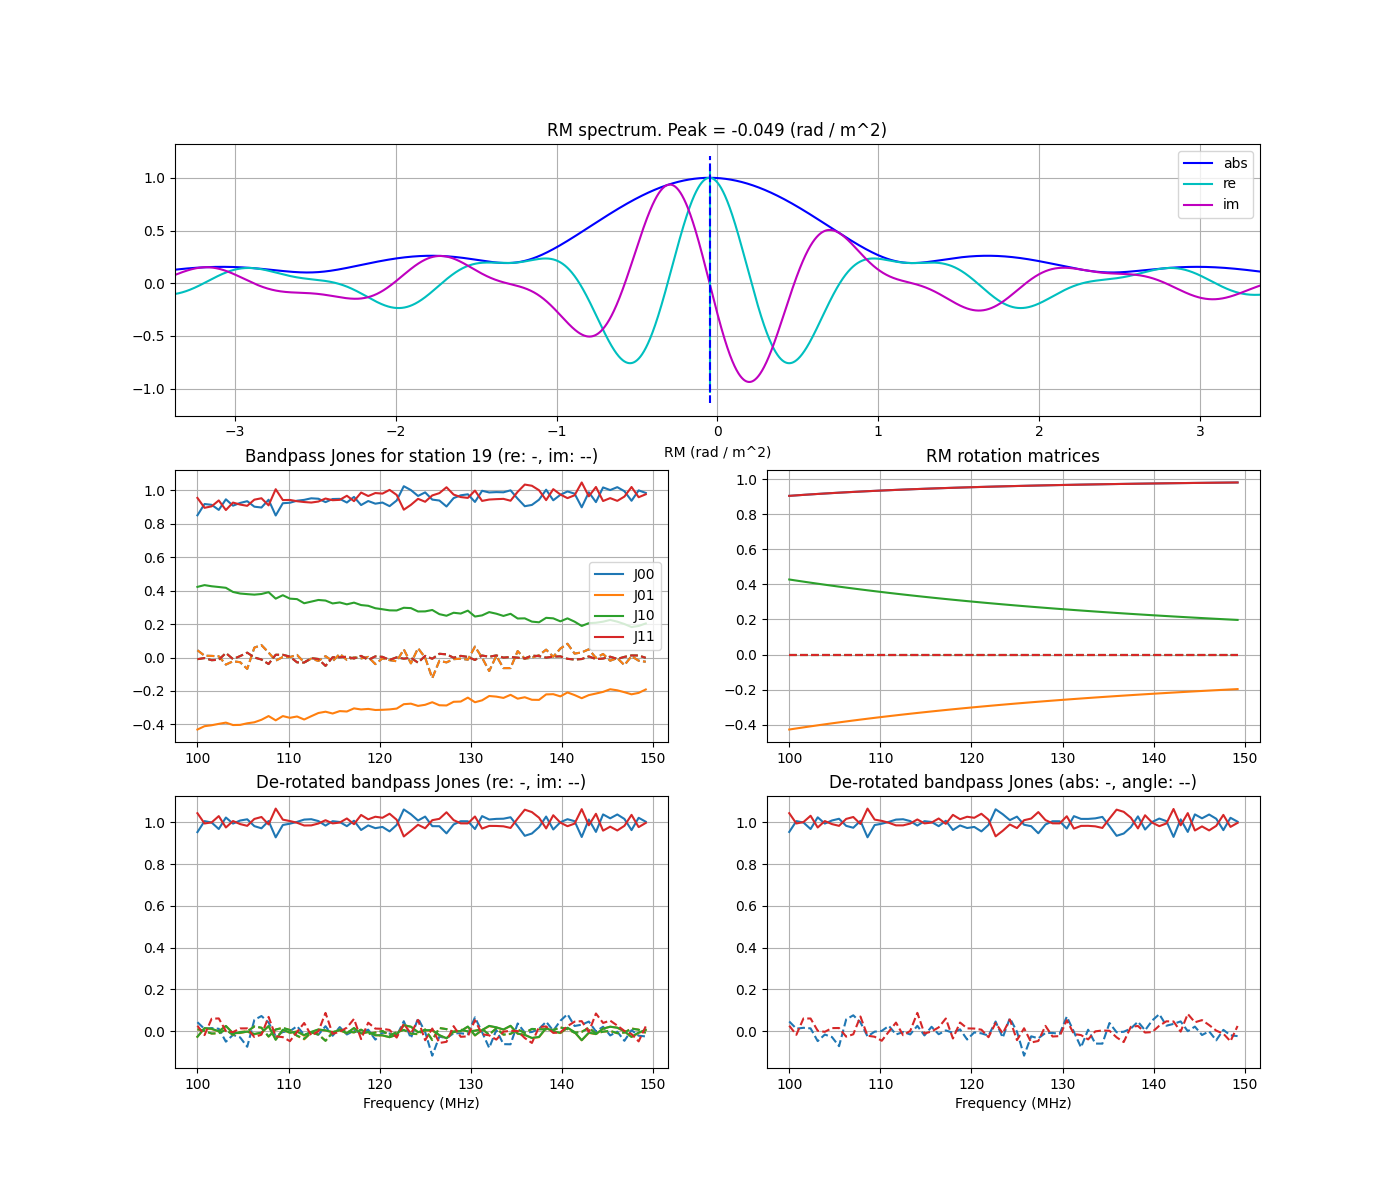

In [3]:
Image(filename="rm-station.png")

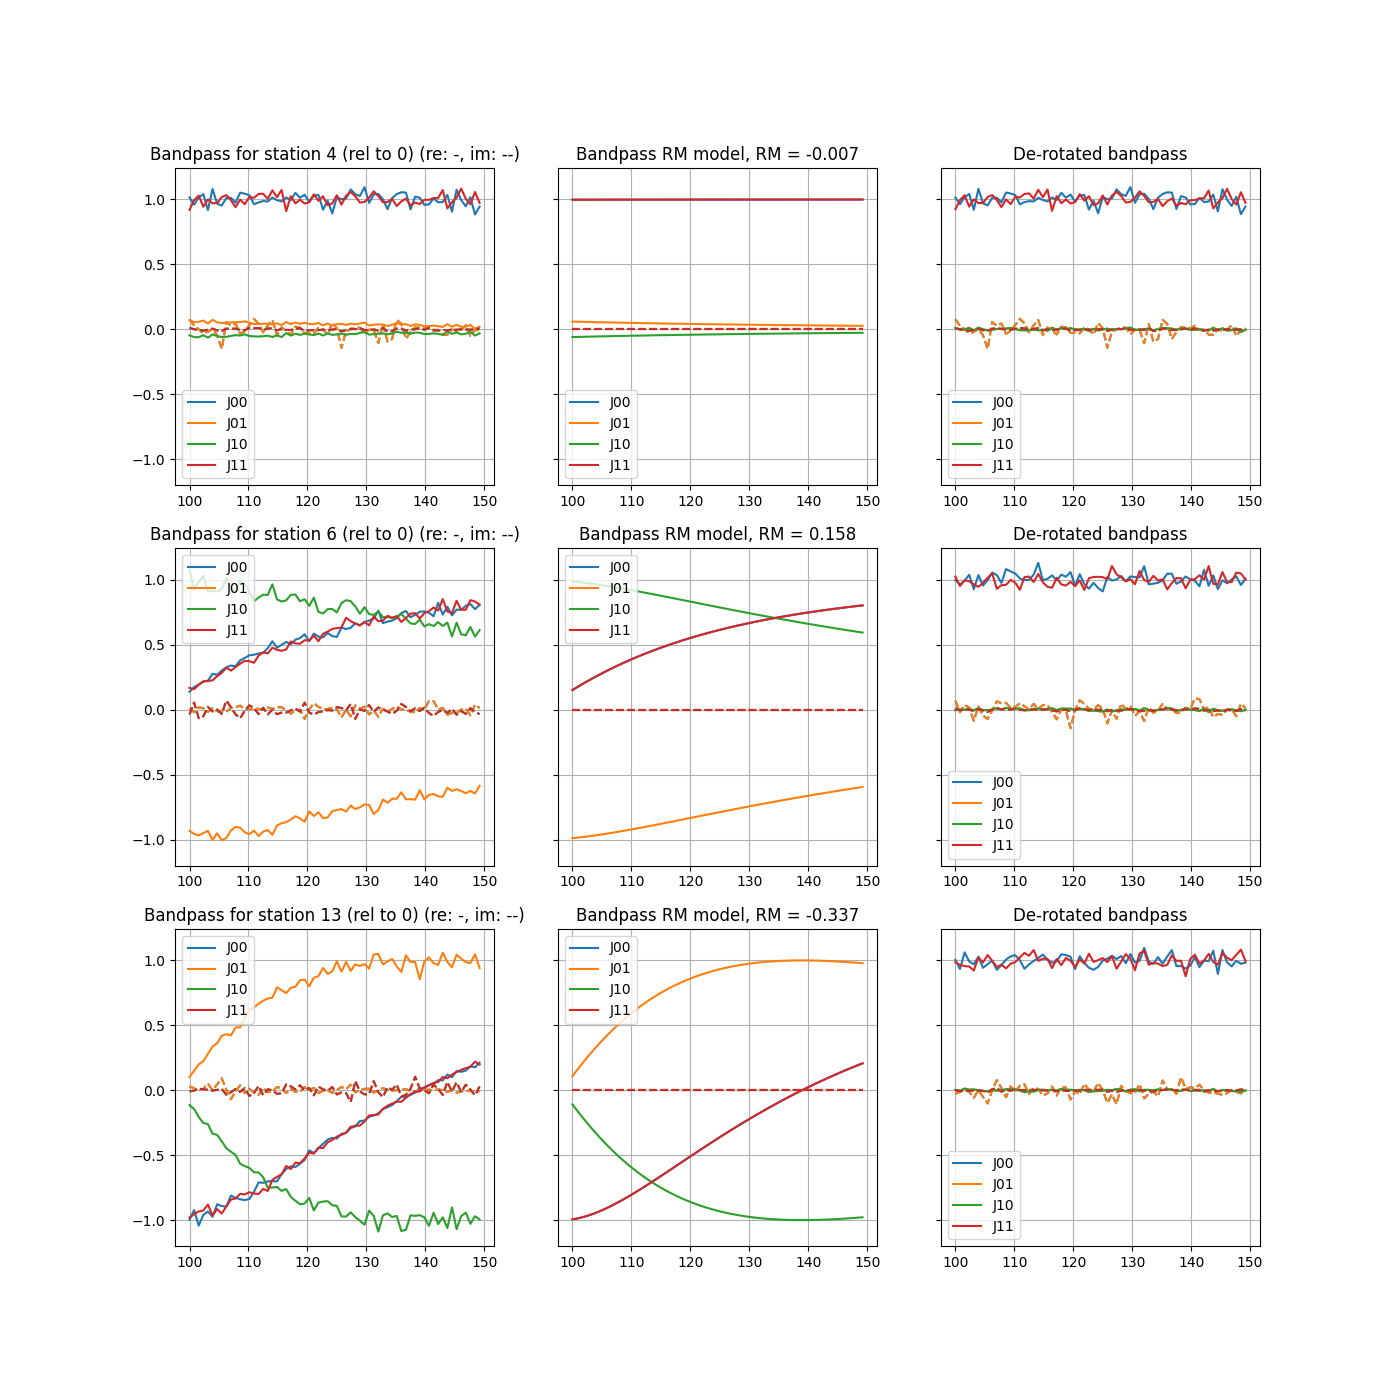

In [4]:
Image(filename="bandpass_stages.png")